In [1]:
#import libraries
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import random
from scipy.stats import chisquare

In [2]:
def benford_x_digit(rawdata,digit):
    data_nonzero=filter(lambda n: n !=0. , rawdata)
    data=list(data_nonzero)
    BFD= [math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]
    data_count={}
    for i in range(10**(digit-1),10**digit):
        data_count[i]=0      
    data_xdigits=[int(str(abs(x*1000))[0:digit]) for x in data]
    for i in range(len(data_xdigits)):
            data_count[data_xdigits[i]]=data_count[data_xdigits[i]]+1
    list_tuples=sorted(data_count.items())
    data_count=[i[1] for i in list_tuples]
    total_count=sum(data_count)
    expected_count=[p * total_count for p in BFD]
    return  data_count, expected_count

In [3]:
def plot_benford(data,digit):   
    data_count, expected_count =benford_x_digit(data,digit)
    y1 = expected_count
    y2 = data_count
    x= np.arange(10**(digit-1),10**digit)
    bins = np.linspace(1, 10)
    width=.35
    plt.bar(x, y1, width, label="Benford")
    plt.bar(x+width, y2, width, label="Actual")
    plt.xticks(x+width/2 , x)
    plt.legend(loc='upper right')
    plt.show()

In [6]:
#data=[4,1,2,3,4,10,2,4,334,667,878,989,7,12,22,100,132,144,167,1000,190,58,299,4,30,500,0,72,-1,0.02,999999,100,111,34,111,12,3,5,7,6,8,9,6,23,3,6,214,38,1,223,2,11,223,4,1,2,33,4,55,]
df= pd.read_excel("./test_data/data.xlsx")
df

,Unnamed: 0,field1,field2,field3
0,0,49,1134,-193
1,1,289,28599,15835
2,2,-15,403,-631
3,3,-157,3768,2286
4,4,0,-3,1
...,...,...,...,...
19995,19995,-114,-5218,-3492
19996,19996,-25,1335,-812
19997,19997,-1,-330,93
19998,19998,47,-215,-278


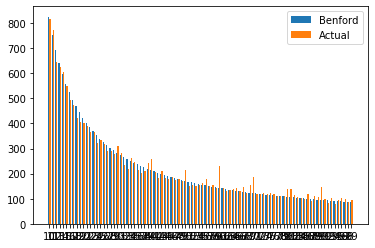

In [13]:
digit=2
data=df["field3"].tolist()
plot_benford(data,digit)

In [14]:
[math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]


[0.04139268515822508,
 0.037788560889399754,
 0.03476210625921191,
 0.032184683371401235,
 0.029963223377443202,
 0.028028723600243534,
 0.02632893872234915,
 0.024823583725032145,
 0.0234810958495229,
 0.022276394711152208,
 0.021189299069938092,
 0.02020338608828699,
 0.019305155195386624,
 0.018483405694013133,
 0.017728766960431616,
 0.01703333929878037,
 0.016390416188169384,
 0.015794267183231885,
 0.015239966556736905,
 0.014723256820706378,
 0.014240439114610285,
 0.013788284485633285,
 0.013363961557981502,
 0.012964977164367635,
 0.012589127308020467,
 0.012234456417011586,
 0.01189922329970769,
 0.011581872549815138,
 0.011281010409689084,
 0.010995384301463145,
 0.010723865391773066,
 0.010465433678164979,
 0.010219165181686028,
 0.009984220906600923,
 0.00975983728915624,
 0.009545317906230361,
 0.009340026254143432,
 0.009143379439869719,
 0.008954842652926412,
 0.008773924307505152,
 0.00860017176191757,
 0.008433167536862764,
 0.008272525965989857,
 0.00811789022217946,

In [8]:
def chi_square_test(data_count,digit):
    total_count=sum(data_count)  
    BFD= [math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]
    expected_count=[p * total_count for p in BFD]     
    chisq, pvalue = chisquare(data_count, f_exp=expected_count) 
    return chisq , pvalue




In [9]:
data_count, expected_count =benford_x_digit(data,1)
total_count=sum(data_count)  
data_count
chisquare, pvalue = chi_square_test(data_count,digit)
print("CHI square statistic:",chisquare)
print("p value",pvalue)



CHI square statistic: 52.26561955957657
p value 1.4955724347313005e-08


In [10]:
anomalies=[]
delta_list=[]
for i in range(len(data_count)):
    delta=((expected_count[i]-data_count[i])**2)
    delta_list.append(delta)
    anomalies.append([i+1,data_count[i],expected_count[i],delta])

std= np.std(delta_list)
mean=np.mean(delta_list)
print(std, mean)

12457.50031190878 12382.240633106827


In [11]:
anomalies

[[1, 5802, 6003.140173531113, 40457.36940812619],
 [2, 3355, 3511.611888088395, 24527.28349061198],
 [3, 2426, 2491.5282854427173, 4293.95619306224],
 [4, 1930, 1932.5794794066612, 6.653714009389326],
 [5, 1610, 1579.032408681734, 958.9917120551395],
 [6, 1468, 1335.052878813689, 17674.937031727677],
 [7, 1236, 1156.4754066290288, 6324.16095081831],
 [8, 1128, 1020.0836026456777, 11645.948817935974],
 [9, 987, 912.4958767609837, 5550.864379614526]]